#Base Model that Prints Output


In [1]:
#inputs
total_sqft = 180000

m = -0.05
b = 1.5

op_expense_per_sqft = 1.20
heating_surcharge_per_sqft = .2
op_exp_annual_growth = .12
annual_mortgage = 1500000
tax_rate = .34

price_per_sqft = [15, 15, 15, 15, 15]

num_years = 5


In [2]:
#rev calc
perc_occ = [m*price_per_sqft[i] + b for i in range(num_years)]
sqft_occ = [perc_occ[i]*total_sqft for i in range(num_years)]
revenue = [sqft_occ[i]*price_per_sqft[i] for i in range(num_years)]
print("revenue: ", revenue)

revenue:  [2025000.0, 2025000.0, 2025000.0, 2025000.0, 2025000.0]


In [3]:
#operating expense calculations
base_op_cost_as_percY1 = [(1+op_exp_annual_growth)**i for i in range(num_years)] #note that range(num_years) = range(5) = [0,1,2,3,4] and (1+op_exp_annual_growth)**0 = 1.
base_op_cost = [op_expense_per_sqft*total_sqft*base_op_cost_as_percY1[i] for i in range(num_years)]
heating_surcharge = [perc_occ[i]*base_op_cost[i]*heating_surcharge_per_sqft for i in range(num_years)]
mortgage = [annual_mortgage for i in range(num_years)]
operating_costs = [base_op_cost[i] + heating_surcharge[i] + mortgage[i] for i in range(num_years)]
print("operating costs:", operating_costs)

operating costs: [1748400.0, 1778208.0, 1811592.96, 1848984.1152000001, 1890862.2090240002]


In [4]:
#before and after-tax earnings
ebt = [revenue[i] - operating_costs[i] for i in range(num_years)]
taxes = [ebt[i]*tax_rate for i in range(num_years)]
earnings_after_tax = [ebt[i] - taxes[i] for i in range(num_years)]
print("earnings after tax: ", earnings_after_tax)

total_earnings_after_tax = sum(earnings_after_tax)
print("total earnings after tax: ", total_earnings_after_tax)

earnings after tax:  [182556.0, 162882.72, 140848.64640000003, 116170.48396799993, 88530.94204415986]
total earnings after tax:  690988.7924121598


#Model as Function



In [5]:
def office_earnings(total_sqft = 180000,
           m = -0.05,
           b = 1.5,
           op_expense_per_sqft = 1.20,
           heating_surcharge_per_sqft = .2,
           op_exp_annual_growth = .12,
           annual_mortgage = 1500000,
           tax_rate = .34,
           price_per_sqft = [15, 15, 15, 15, 15],
           num_years = 5):
  #rev calc
  perc_occ = [m*price_per_sqft[i] + b for i in range(num_years)]
  sqft_occ = [perc_occ[i]*total_sqft for i in range(num_years)]
  revenue = [sqft_occ[i]*price_per_sqft[i] for i in range(num_years)]
  
  #operating expense calculations
  base_op_cost_as_percY1 = [(1+op_exp_annual_growth)**i for i in range(num_years)] #note that range(num_years) = range(5) = [0,1,2,3,4] and (1+op_exp_annual_growth)**0 = 1.
  base_op_cost = [op_expense_per_sqft*total_sqft*base_op_cost_as_percY1[i] for i in range(num_years)]
  heating_surcharge = [perc_occ[i]*base_op_cost[i]*heating_surcharge_per_sqft for i in range(num_years)]
  mortgage = [annual_mortgage for i in range(num_years)]
  operating_costs = [base_op_cost[i] + heating_surcharge[i] + mortgage[i] for i in range(num_years)]
  
  #before and after-tax earnings
  ebt = [revenue[i] - operating_costs[i] for i in range(num_years)]
  taxes = [ebt[i]*tax_rate for i in range(num_years)]
  earnings_after_tax = [ebt[i] - taxes[i] for i in range(num_years)]
  total_earnings_after_tax = sum(earnings_after_tax)
  
  return total_earnings_after_tax


In [6]:
office_earnings()

690988.7924121598

## Multivariate MC Analysis

In the model, assume that each of the first 6 input variables (``total_sqft``, ``m``, ``b``, ``op_expense_per_sqft``, ``heating_surcharge_per_sqft``, ``op_exp_annual_growth``) are uncertain, and we will capture this uncertainty via ``normal distributions`` with ``standard deviations 20%`` of the (absolute value of) the default input value (and means equal to the default input values). You can assume all the other inputs are constant at their default values.

In [22]:
# Install necessary libraries
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm


In [10]:
# Calculate Standard Deviations for uncertain inputs
total_sqft_std = abs(total_sqft) * 0.2
m_std = abs(m) * 0.2
b_std = abs(b) * 0.2
op_expense_per_sqft_std = abs(op_expense_per_sqft) * 0.2
heating_surcharge_per_sqft_std = abs(heating_surcharge_per_sqft) * 0.2
op_exp_annual_growth_std = abs(op_exp_annual_growth) * 0.2

# Set the number of simulations
num_sims = 10000

In [11]:
# Determine the list of simulated inputs for each uncertain input
total_sqft_sim = np.random.normal(total_sqft, total_sqft_std, num_sims)
m_sim = np.random.normal(m, m_std, num_sims)
b_sim = np.random.normal(b, b_std, num_sims)
op_expense_per_sqft_sim = np.random.normal(op_expense_per_sqft, op_expense_per_sqft_std, num_sims)
heating_surcharge_per_sqft_sim = np.random.normal(heating_surcharge_per_sqft, heating_surcharge_per_sqft_std, num_sims)
op_exp_annual_growth_sim = np.random.normal(op_exp_annual_growth, op_exp_annual_growth_std, num_sims)

In [12]:
# Evaluate the profit outcome for each scenario
earnings_sim = [office_earnings(total_sqft = total_sqft_sim[i],
                               m = m_sim[i],
                               b = b_sim[i],
                               op_expense_per_sqft = op_expense_per_sqft_sim[i],
                               heating_surcharge_per_sqft = heating_surcharge_per_sqft_sim[i],
                               op_exp_annual_growth = op_exp_annual_growth_sim[i]) for i in range(num_sims)]

In [14]:
# Calculate the IQR for the earnings results
q1 = np.percentile(earnings_sim, 25)
q3 = np.percentile(earnings_sim, 75)
mean = np.mean(earnings_sim)
median = np.median(earnings_sim)

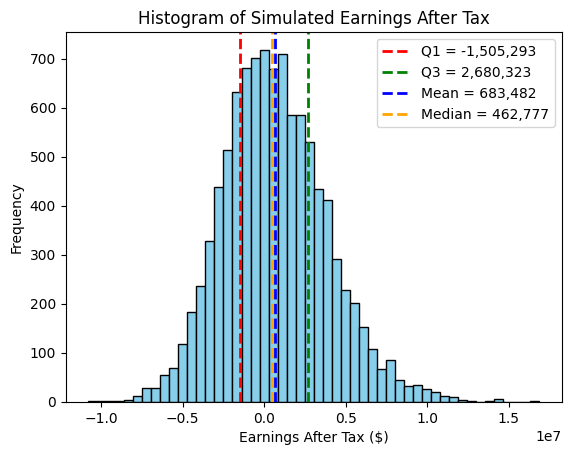

In [16]:
# Plot a histogram of the simulated earnings results

plt.hist(earnings_sim, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Earnings After Tax ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Simulated Earnings After Tax')
# Add lines for Q1, Q3, Mean, and Median
plt.axvline(q1, color='red', linestyle='dashed', linewidth=2, label=f'Q1 = {q1:,.0f}')
plt.axvline(q3, color='green', linestyle='dashed', linewidth=2, label=f'Q3 = {q3:,.0f}')
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean = {mean:,.0f}')
plt.axvline(median, color='orange', linestyle='dashed', linewidth=2, label=f'Median = {median:,.0f}')
plt.legend()
plt.show()

In [18]:
# Import the results of the uncertain imputs and earnings outcomes into a DataFrame
data_df = pd.DataFrame({
    'Total_Sqft': total_sqft_sim,
    'm': m_sim,
    'b': b_sim,
    'Op_Expense_per_Sqft': op_expense_per_sqft_sim,
    'Heating_Surcharge_per_Sqft': heating_surcharge_per_sqft_sim,
    'Op_Exp_Annual_Growth': op_exp_annual_growth_sim,
    'Earnings_After_Tax': earnings_sim
})

data_df

,Total_Sqft,m,b,Op_Expense_per_Sqft,Heating_Surcharge_per_Sqft,Op_Exp_Annual_Growth,Earnings_After_Tax
0,202704.254082,-0.049709,1.931241,0.901360,0.154260,0.136511,6.009769e+06
1,209730.543779,-0.058368,1.603185,1.718614,0.163745,0.128171,8.852790e+05
2,207703.728231,-0.058595,1.402023,0.851620,0.238626,0.079037,-3.407250e+05
3,151598.209435,-0.053872,1.246845,1.304253,0.159561,0.122834,-2.549489e+06
4,163400.886626,-0.045872,1.631747,1.170792,0.188295,0.107695,1.760818e+06
...,...,...,...,...,...,...,...
9995,216978.703174,-0.048640,1.148735,1.490658,0.158287,0.122533,-1.901700e+06
9996,196181.212894,-0.028202,1.952997,1.290272,0.263222,0.135801,8.371313e+06
9997,229079.410510,-0.061808,1.786816,1.300902,0.253707,0.099695,3.336612e+06
9998,203249.826547,-0.057333,1.436750,1.431287,0.168098,0.128325,-5.077283e+05


In [25]:
# Linear regression to determine which uncertain inputs have the most influence on earnings
X = data_df[['Total_Sqft', 'm', 'b', 'Op_Expense_per_Sqft', 'Heating_Surcharge_per_Sqft', 'Op_Exp_Annual_Growth']]
y = data_df['Earnings_After_Tax']

# Add constant to the model
X = sm.add_constant(X)

mod = sm.OLS(y, X, hasconst = True)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Earnings_After_Tax   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 4.759e+04
Date:                Fri, 19 Sep 2025   Prob (F-statistic):               0.00
Time:                        07:14:36   Log-Likelihood:            -1.4697e+05
No. Observations:               10000   AIC:                         2.940e+05
Df Residuals:                    9993   BIC:                         2.940e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.007e+07   7.28e+04   -138.427      0.000   -1.02e+07   -9.93e+06
Total_Sqft                    31.6724      0.161    196.542      0.000      31.357      31.988
m                           1.304e+08   5.87e+05    222.272      0.000    1.29e+08    1.32e+08
b                            8.71e+06   1.97e+04    441.755      0.000    8.67e+06    8.75e+06
Op_Expense_per_Sqft        -9.325e+05   2.44e+04    -38.220      0.000    -9.8e+05   -8.85e+05
Heating_Surcharge_per_Sqft -7.673e+05   1.46e+05     -5.253      0.000   -1.05e+06   -4.81e+05
Op_Exp_Annual_Growth       -1.773e+06   2.44e+05     -7.259      0.000   -2.25e+06   -1.29e+06
==============================================================================
Omnibus:                     1250.919   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13316.324
Skew:                           0.163   Prob(JB):                         0.00
Kurtosis:                       8.644   Cond. No.                     1.84e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# normalize graph of coefficients
result.params * X.std()

const                        -0.000000e+00
Total_Sqft                    1.149438e+06
m                             1.299682e+06
b                             2.583384e+06
Op_Expense_per_Sqft          -2.234879e+05
Heating_Surcharge_per_Sqft   -3.072527e+04
Op_Exp_Annual_Growth         -4.244816e+04
dtype: float64

<Axes: >

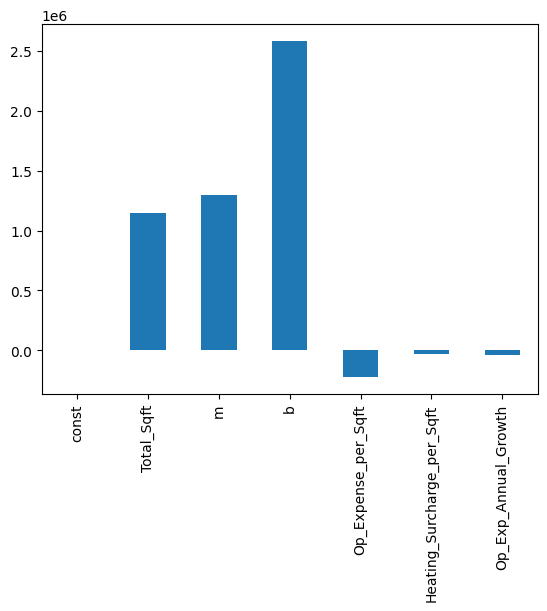

In [27]:
norm_coefficients = result.params * X.std()

norm_coefficients.plot.bar()